# SSN - kot czy pies?

Imię i nazwisko: Marcin Bobiński

Celem ćwiczenia jest budowa sieci konwolucyjnej do klasyfikacji zdjęć psów i kotów

Wykorzeystano danę uczące - Microsoft Kaggle Cats and Dogs Dataset

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [2]:
# ścieżka musi się zgadzać z tym gdzie mamy dane
data_dir = 'kagglecatsanddogs_3367a/PetImages'
img_size = 128 # do sieci będziemy podawać obrazy o rozmiarze 128x128
batch_size = 32 # liczba zdjęć na jeden krok uczenia

In [3]:
# podział na zbiór uczący i walidacyjny, oraz określenie przeskalowania obrazów i rozmiaru batcha
train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=0,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb'
)
val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=0,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


In [4]:
model = tf.keras.models.Sequential()
# normalizacja do zakresu <0, 1>
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1/255, input_shape=(img_size, img_size, 3)))

model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu', padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(7, 7), activation='relu', padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        25664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 64)        2

In [6]:
# Uczenie
model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
586/586 [==============================] - 65s 106ms/step - loss: 0.7056 - accuracy: 0.6121 - val_loss: 0.6287 - val_accuracy: 0.6492
Epoch 2/10
586/586 [==============================] - 62s 105ms/step - loss: 0.5265 - accuracy: 0.7389 - val_loss: 1.2793 - val_accuracy: 0.5414
Epoch 3/10
586/586 [==============================] - 62s 105ms/step - loss: 0.4371 - accuracy: 0.7912 - val_loss: 0.4499 - val_accuracy: 0.7925
Epoch 4/10
586/586 [==============================] - 62s 104ms/step - loss: 0.3616 - accuracy: 0.8380 - val_loss: 0.4667 - val_accuracy: 0.7765
Epoch 5/10
586/586 [==============================] - 61s 104ms/step - loss: 0.3092 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.8202
Epoch 6/10
586/586 [==============================] - 61s 104ms/step - loss: 0.2464 - accuracy: 0.8985 - val_loss: 0.3844 - val_accuracy: 0.8345
Epoch 7/10
586/586 [==============================] - 61s 104ms/step - loss: 0.2106 - accuracy: 0.9151 - val_loss: 0.4697 - val_ac

In [7]:
# ocena na zbiorze 
model.evaluate(train)

586/586 [==============================] - 37s 63ms/step - loss: 0.0785 - accuracy: 0.9711


[0.07846169918775558, 0.9710748195648193]

In [8]:
# ocena na zbiorze walidacyjnym
model.evaluate(val)

147/147 [==============================] - 9s 61ms/step - loss: 0.4212 - accuracy: 0.8476


[0.42122599482536316, 0.8475661873817444]

In [9]:
# utworzony model można sobie zapisać
#model.save('plik.h5')

In [10]:
# oraz wczytać
#model = tf.keras.models.load_model('plik.h5')

### Predykcja dla wybranego zdjęcia

In [11]:
# ścieżka do wybranego zdjęcia
path = 'kagglecatsanddogs_3367a/PetImages/Cat/1.jpg'

In [12]:
image = tf.keras.preprocessing.image.load_img(path, target_size=(img_size, img_size))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr_batch = np.array([input_arr])
predictions = model.predict(input_arr_batch)

In [13]:
# 0 - cat
# 1 - dog
print(predictions)
print("Dog" if predictions[0][0]>0.5 else "Cat")


[[1.3476803e-05]]
Cat


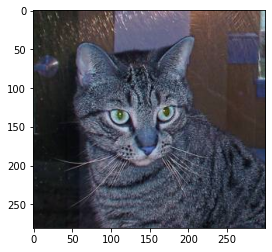

In [14]:
img = cv2.imread(path)
plt.imshow(img)
plt.show()